In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [1]:
relevant_errors = ['uninitvar',
              'unreadVariable',
              'shadowFunction',
              'shadowVariable',
              'shadowArgument',
              'knownConditionTrueFalse',
              'redundantCondition',
              'multiCondition',
              'duplicateExpression',
              'duplicateBreak',
              'uninitStructMember',
              'noConstructor',
              'unreachableCode',
              'knownEmptyContainer',
              'clarifyCondition',
              'selfAssignment',
              'negativeContainerIndex',
              'containerOutOfBounds',
              'identicalInnerCondition',
              'passedByValue',
              'stlFindInsert',
              'iterateByValue',
              'useInitializationList',
              'missingReturn',
              'legacyUninitvar',
              'internalAstError',
              'selfInitialization',
              'constStatement']
error_indexes = {val: idx for idx, val in enumerate(relevant_errors)}




In [3]:
def counter(filename):
    file = open(filename)
    file_json = json.load(file)
    list_dicts_results = [{'WA': 0, 'CE': 0, 'RTE': 0, 'TLE':0,  'OLE':0, 'AC': 0} for _ in relevant_errors]
    for envio in file_json:
        try:
            judge_result = file_json[envio]['judge_result']
            
            for error in file_json[envio]['error_list']:
                index = error_indexes[error['error_name']]
                list_dicts_results[index][judge_result] += 1
        except KeyError:
            continue
    return list_dicts_results

In [4]:
list_dicts_results = counter('claseCppcheck.json')
for i, dic in enumerate(list_dicts_results):
    list_dicts_results[i] = {key:dic[key] for key in dic.keys() if dic[key] > 0}
    
for error, dic in zip(relevant_errors, list_dicts_results):
    print(error, ': ', dic)

uninitvar :  {'WA': 6, 'RTE': 6, 'TLE': 4, 'AC': 5}
unreadVariable :  {'WA': 108, 'CE': 20, 'RTE': 35, 'TLE': 39, 'AC': 96}
shadowFunction :  {'WA': 11, 'RTE': 2, 'AC': 2}
shadowVariable :  {'WA': 34, 'CE': 10, 'RTE': 1, 'TLE': 12, 'OLE': 1, 'AC': 38}
shadowArgument :  {'WA': 2, 'CE': 4, 'RTE': 6, 'AC': 7}
knownConditionTrueFalse :  {'WA': 15, 'CE': 5, 'RTE': 12, 'TLE': 17, 'AC': 3}
redundantCondition :  {'RTE': 3, 'TLE': 1}
multiCondition :  {'RTE': 2}
duplicateExpression :  {'WA': 5, 'CE': 2, 'RTE': 1, 'TLE': 9}
duplicateBreak :  {'AC': 1}
uninitStructMember :  {'WA': 16, 'RTE': 3, 'AC': 3}
noConstructor :  {'TLE': 1, 'AC': 1}
unreachableCode :  {'AC': 1}
knownEmptyContainer :  {'OLE': 1}
clarifyCondition :  {'WA': 1}
selfAssignment :  {'WA': 7}
negativeContainerIndex :  {'RTE': 2, 'AC': 4}
containerOutOfBounds :  {'WA': 1, 'CE': 5, 'RTE': 14, 'AC': 1}
identicalInnerCondition :  {'AC': 1}
passedByValue :  {'WA': 16, 'CE': 3, 'RTE': 18, 'TLE': 26, 'AC': 28}
stlFindInsert :  {'WA': 2, 

In [5]:
list_dict_percentages = []

for i, dic in enumerate(list_dicts_results):
    s = sum(dic.values())
    dic_percentage = {key:str(round((dic[key] * 100.0 / s), 2)) + "%" for key in dic.keys()}
    list_dict_percentages.append(dic_percentage)

for error, dic in zip(relevant_errors, list_dict_percentages):
    print(error, ': ', dic)

uninitvar :  {'WA': '28.57%', 'RTE': '28.57%', 'TLE': '19.05%', 'AC': '23.81%'}
unreadVariable :  {'WA': '36.24%', 'CE': '6.71%', 'RTE': '11.74%', 'TLE': '13.09%', 'AC': '32.21%'}
shadowFunction :  {'WA': '73.33%', 'RTE': '13.33%', 'AC': '13.33%'}
shadowVariable :  {'WA': '35.42%', 'CE': '10.42%', 'RTE': '1.04%', 'TLE': '12.5%', 'OLE': '1.04%', 'AC': '39.58%'}
shadowArgument :  {'WA': '10.53%', 'CE': '21.05%', 'RTE': '31.58%', 'AC': '36.84%'}
knownConditionTrueFalse :  {'WA': '28.85%', 'CE': '9.62%', 'RTE': '23.08%', 'TLE': '32.69%', 'AC': '5.77%'}
redundantCondition :  {'RTE': '75.0%', 'TLE': '25.0%'}
multiCondition :  {'RTE': '100.0%'}
duplicateExpression :  {'WA': '29.41%', 'CE': '11.76%', 'RTE': '5.88%', 'TLE': '52.94%'}
duplicateBreak :  {'AC': '100.0%'}
uninitStructMember :  {'WA': '72.73%', 'RTE': '13.64%', 'AC': '13.64%'}
noConstructor :  {'TLE': '50.0%', 'AC': '50.0%'}
unreachableCode :  {'AC': '100.0%'}
knownEmptyContainer :  {'OLE': '100.0%'}
clarifyCondition :  {'WA': '100.

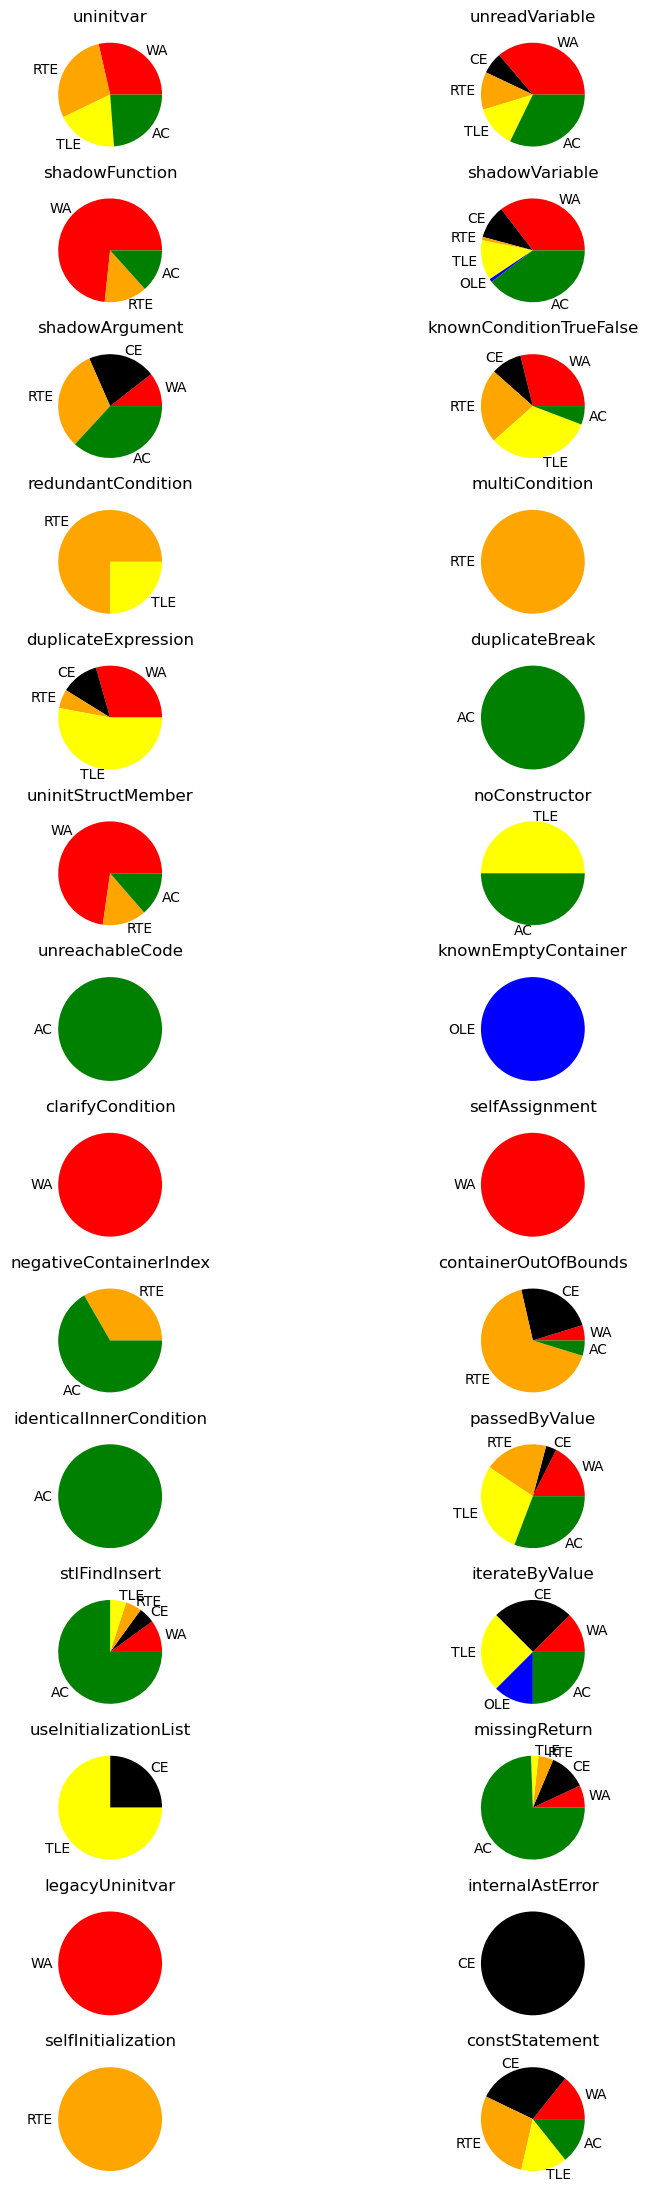

In [11]:
plt.rcParams['figure.figsize'] = [10, 30]
count = 1

# Define a custom color dictionary
custom_colors = {'AC': 'green', 'WA': 'red', 'TLE': 'yellow', 'RTE': 'orange', 'CE': 'black','OLE': 'blue'}

for error, dic in zip(relevant_errors, list_dicts_results):
    plt.subplot(len(relevant_errors)//2+1, 2, count)
    plt.pie(dic.values(), labels=dic.keys(), colors=[custom_colors.get(label, 'blue') for label in dic.keys()])
    plt.title(error)
    count += 1



plt.savefig('results_per_error.pdf')